# Quasar spectra using lya_spectra and lya_mock_p1d
The goal of this notebook is to generate a set of quasar spectra simulations, that are then analized with redrock to classify and get the redshift. 

We assume that desi code is installed as described in :
https://desi.lbl.gov/trac/wiki/Pipeline/GettingStarted/Laptop/JuneMeeting
And this uses the Master Branch

The only identified issue is with astropy v2, this should be downgraded to v1.3.3, after installing healpy. If installed before, healpy will upgrade again and then functions dealing with writting fits files will complain.

First we import the basic modules we need. 

In [45]:
%pylab inline


import os
import matplotlib.pyplot as plt



import numpy as np
from astropy.io import fits
from astropy.table import Table
import desispec.io
import desisim.io
from desisim.obs import new_exposure
from desisim.scripts import quickgen
from desisim import lya_spectra,lya_mock_p1d
from desispec.scripts import group_spectra




Populating the interactive namespace from numpy and matplotlib


/Users/alxogm/miniconda3/envs/desi/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Environment variables and data

We will specify the enviroment variables, specially where to find the DESI spectra templates, and where do we want to save the simulated spectra. Then check enviroment variables. I assumes the desi enviroment is already set. 

In [46]:
def check_env():
    for env in ('DESIMODEL', 'DESI_ROOT', 'DESI_SPECTRO_SIM', 'DESI_SPECTRO_DATA', 
            'DESI_SPECTRO_REDUX', 'SPECPROD', 'PIXPROD'):
        if env in os.environ:
            print('{} environment set to {}'.format(env, os.getenv(env)))
        else:
            print('Required environment variable {} not set!'.format(env))
            
check_env()

%set_env SPECPROD=Lya
%set_env PIXPROD=Lya
rawdata_dir = desisim.io.simdir()
%set_env DESI_SPECTRO_DATA=$rawdata_dir

print('Simulated raw data will be written to {}'.format(desisim.io.simdir()))
print('Pipeline will read raw data from {}'.format(desispec.io.rawdata_root()))
print('    (without knowing that it was simulated)')
print('Pipeline will write processed data to {}'.format(desispec.io.specprod_root()))

DESIMODEL environment set to /Users/alxogm/Dropbox/desi/code/desimodel
DESI_ROOT environment set to /Users/alxogm/Dropbox/desi
DESI_SPECTRO_SIM environment set to /Users/alxogm/Dropbox/desi/spectro/sim
DESI_SPECTRO_DATA environment set to /Users/alxogm/Dropbox/desi/spectro/sim/Lya/
DESI_SPECTRO_REDUX environment set to /Users/alxogm/Dropbox/desi/spectro/redux
SPECPROD environment set to Lya
PIXPROD environment set to Lya
env: SPECPROD=Lya
env: PIXPROD=Lya
env: DESI_SPECTRO_DATA=/Users/alxogm/Dropbox/desi/spectro/sim/Lya/
Simulated raw data will be written to /Users/alxogm/Dropbox/desi/spectro/sim/Lya/
Pipeline will read raw data from /Users/alxogm/Dropbox/desi/spectro/sim/Lya/
    (without knowing that it was simulated)
Pipeline will write processed data to /Users/alxogm/Dropbox/desi/spectro/redux/Lya


In [47]:
lya_spectra?

In [49]:
%rm lya_spec_test2.fits

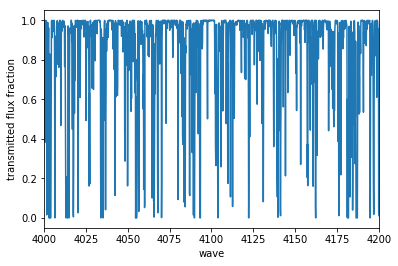

In [50]:
fname='lya_spec_test2.fits'
Ns=1
# number of cells (power of two)
N2 = 15
# cell width (in km/s)
dv_kms=10
# whether to use white noise power or not
white_noise=False
# random seed
seed=555
# generate a mock maker
z=0
mock_maker=lya_mock_p1d.MockMaker(N2,dv_kms,seed,white_noise)
wave, flux = mock_maker.get_lya_skewers(Ns)    
prihdr=fits.Header()

#For now I'll just put them to zero
prihdr['ZQSO']=0
prihdr['RA']=0
prihdr['DEC']=0
prihdr['MAG_G']=0

prihdu=fits.PrimaryHDU(header=prihdr)
tbhdu=fits.BinTableHDU.from_columns([fits.Column(name='wave',format='E',array=wave),
                                    fits.Column(name='flux',format='E',array=flux.T)])
thdulist=fits.HDUList([prihdu,tbhdu])
thdulist.writeto(fname)

for i in range(Ns):
    plt.plot(wave,flux[i])
    plt.xlabel('wave')
    plt.ylabel('transmitted flux fraction')
    plt.xlim(4000,4200)
    plt.show()

In [51]:
hdu = fits.open(fname)
hdu.info()
hdu.close()

Filename: lya_spec_test2.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   ()      
  1              BinTableHDU     12   32768R x 2C   [E, E]   


In [ ]:
TODO: GIVE THE ABOVE FILE to Lya_Spectra